In [1]:
import sys
print(sys.executable)
# Install required libraries using the sys.executable path to ensure they install in the right environment
!{sys.executable} -m pip install pandas numpy
!{sys.executable} -m pip install matplotlib seaborn scikit-learn imblearn tensorflow
!{sys.executable} -m pip install --upgrade setuptools
!{sys.executable} -m pip install --upgrade tensorflow
!{sys.executable} -m pip install distlib



/Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/ruby/Desktop/NYU/Predictive Analytics/HW3/Breast_Cancer_dataset.csv')

In [55]:
print("Initial Data Info")
print(df.info())
print("\nMissing Values Summary:")
print(df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("Number of columns with missing values:", df.isnull().sum().gt(0).sum())

print("\nBasic statistics for numeric columns")
print(df.describe())

Initial Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3823 non-null   float64
 1   Race                    3622 non-null   object 
 2   Marital Status          3703 non-null   object 
 3   T Stage                 4024 non-null   object 
 4   N Stage                 4024 non-null   object 
 5   6th Stage               4024 non-null   object 
 6   differentiate           4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              3622 non-null   float64
 10  Estrogen Status         3823 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  3421 non-null   float64
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months       

In [53]:
print("Basic statistics for categorical columns\n")
df.describe(include='object')

Basic statistics for categorical columns



,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
count,3622,3703,4024,4024,4024,4024,4024,4024,3823,4024,4024
unique,3,5,4,3,5,4,4,2,2,2,2
top,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
freq,3069,2436,1786,2732,1305,2351,2351,3932,3567,3326,3408


In [ ]:
print('\nThe unique value and number for each column is:')
for col in df.columns:
    
    if df[col].dtype == 'object':
        print(df[col].value_counts(), '\n')

Basic statistics for categorical columns


The unique value and number for each column is:
Race
White    3069
Other     290
Black     263
Name: count, dtype: int64 

Marital Status
Married      2436
Single        575
Divorced      436
Widowed       217
Separated      39
Name: count, dtype: int64 

T Stage 
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64 

N Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64 

6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64 

differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64 

Grade
2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: count, dtype: int64 

A Stage
Regional    3932
Distant       92
Name: count, dtype: int64 

Estrogen Status
Positive    3567
Negative     

In [4]:
# Handling missing value and data binning

new_df = df.copy()

# group each age into different range, and replace missing value with 'Unknown'
bins = [-1, 29, 39, 49, 59, 69]
labels = ['Unknown', '30-39', '40-49', '50-59', '60-69']
new_df.loc[:,'age_group'] = pd.cut(new_df['Age'].replace({np.nan: 0}), bins=bins, labels=labels, right=True)
# print(new_df['age_group'].value_counts())

# replace the missing value in Race with 'Unknown'
new_df.loc[:,'Race'] = new_df['Race'].fillna('Unknown')

# replace the missing value in Marital Status with 'Unknown'
new_df.loc[:,'Marital Status'] = new_df['Marital Status'].fillna('Unknown')

# Change the class of Grade, and reassign some value
new_df.loc[new_df['Grade'] == 'anaplastic; Grade IV', 'Grade'] = 4

# Change the attribute A Stage to binary data
new_df.loc[:,'AStage_binary'] = new_df.loc[:,'A Stage'].map({'Regional': 1, 'Distant': 0})

# Change the attribute Progesterone Status to binary data
new_df.loc[:,'Progesterone_Status_binary'] = new_df.loc[:,'Progesterone Status'].map({'Positive': 1, 'Negative': 0})

# Survival Months
bins = [0,12,36,60,84,107]
labels = ['0-12 months', '13-36 months', '37-60 months', '61-84 months', '85+ months']
new_df.loc[:,'survival_month_group'] = pd.cut(new_df.loc[:,'Survival Months'], bins=bins, labels=labels, right=True)

# Tumor Size
new_df = new_df.dropna(subset=['Tumor Size'])

# Regional Node Examined
new_df.loc[:,'regional_node_group'] = new_df.loc[:,'Regional Node Examined'].fillna(new_df.loc[:,'Regional Node Examined'].mean())

# drop the missing value in Estrogen Status
new_df = new_df.dropna(subset=['Estrogen Status'])

new_df.loc[:,'Status'] = new_df['Status'].map({'Dead': 1, 'Alive': 0})


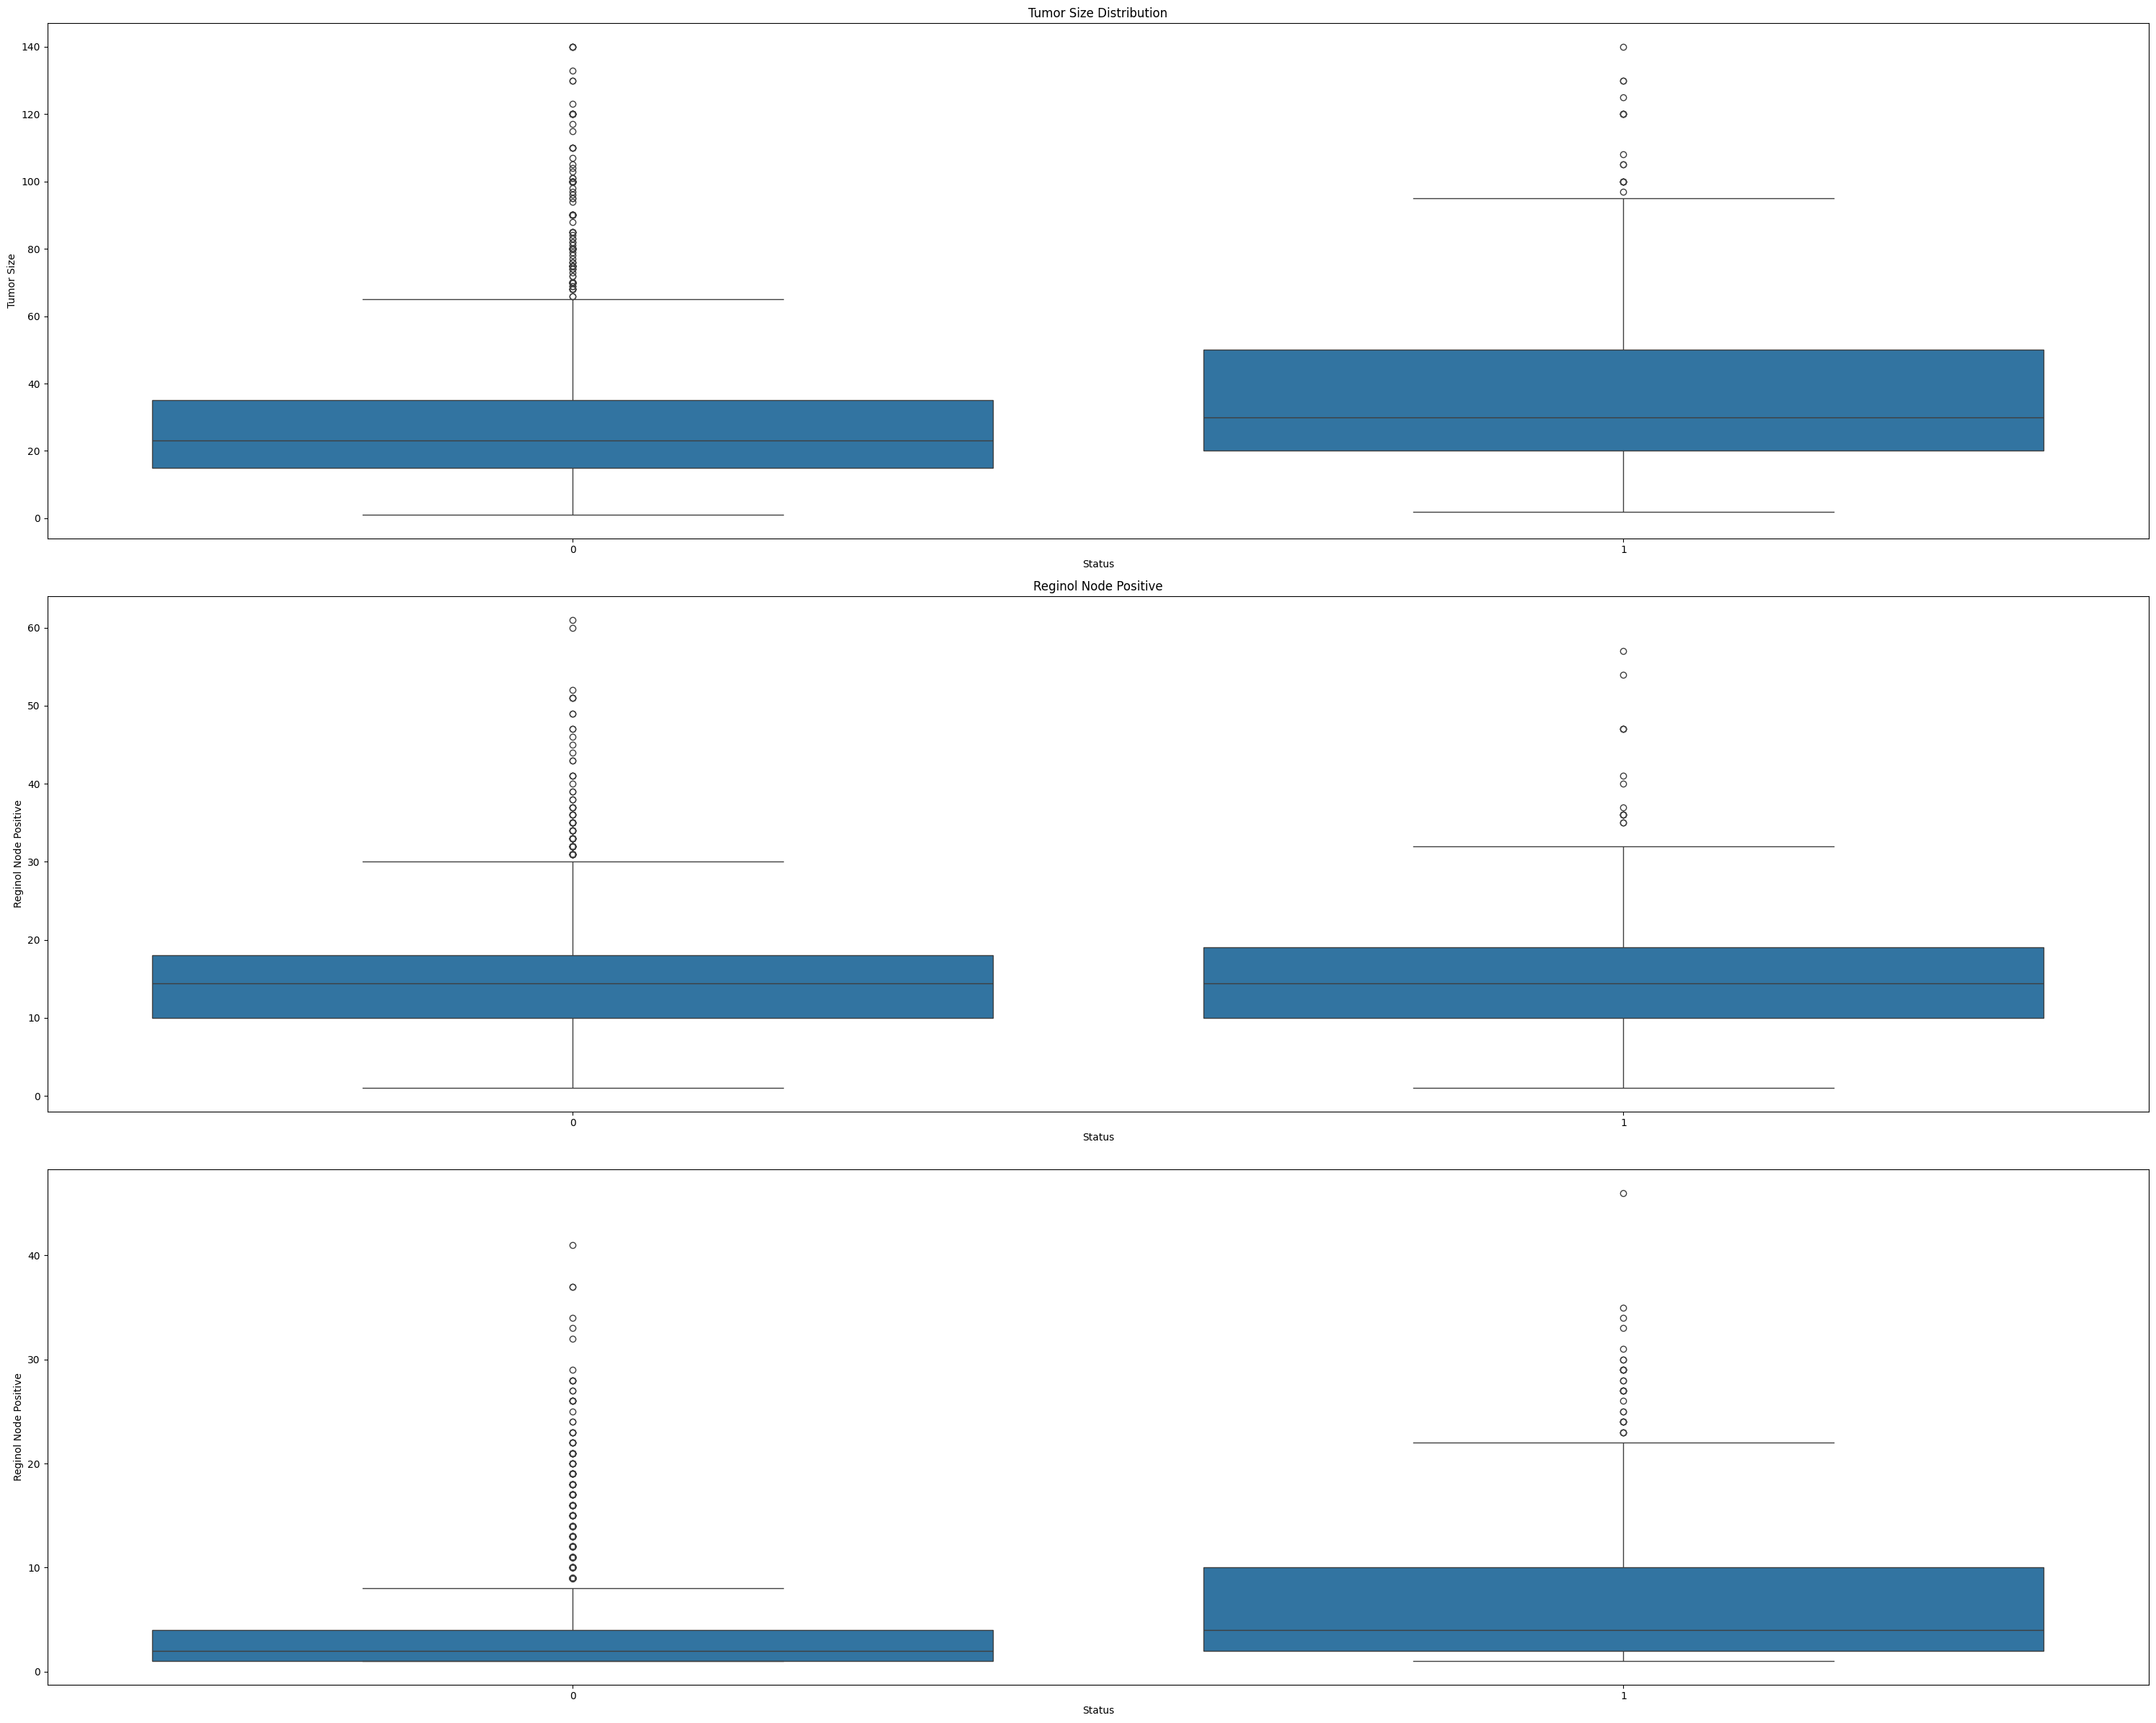

               Age   Tumor Size  Regional Node Examined  \
count  3269.000000  3442.000000             2919.000000   
mean     53.839400    30.658629               14.368619   
std       8.969394    21.428360                8.156946   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    39.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  AStage_binary  \
count            3442.000000      3442.000000    3442.000000   
mean                4.192621        71.411679       0.978210   
std                 5.144110        22.999789       0.146017   
min                 1.000000         1.000000       0.000000   
25%                 1.000000        56.000000       1.000000   
50%                 2.000000        73.000000       1.000000   
75%                 

In [5]:
# check out the outliers of three attributes

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 24))

# Box plot for Tumor Size
sns.boxplot(x='Status', y='Tumor Size', data=new_df, ax=axes[0])
axes[0].set_title('Tumor Size Distribution')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Tumor Size')

# Box plot for Regional Node Examined
sns.boxplot(x='Status', y='regional_node_group', data=new_df, ax=axes[1])
axes[1].set_title('Regional Node Examined')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Regional Node Examined')

# Box plot for Reginol Node Positive
sns.boxplot(x='Status', y='Reginol Node Positive', data=new_df, ax=axes[2])
axes[1].set_title('Reginol Node Positive')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Reginol Node Positive')

plt.tight_layout()
plt.show()

print(new_df.describe())

In [6]:
# Handling outliers
# Remove outliers using IQR method

# Tumor Size
Q1 = new_df.loc[:,"Tumor Size"].quantile(0.25)
Q3 = new_df.loc[:,"Tumor Size"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
new_df = new_df[(new_df.loc[:,"Tumor Size"] >= lower_bound) & (new_df.loc[:,"Tumor Size"] <= upper_bound)]

# Regional Node Examined
Q1 = new_df.loc[:,"Regional Node Examined"].quantile(0.25)
Q3 = new_df.loc[:,"Regional Node Examined"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
new_df = new_df[(new_df.loc[:,"Regional Node Examined"] >= lower_bound) & (new_df.loc[:,"Regional Node Examined"] <= upper_bound)]

# Reginol Node Positive
Q1 = new_df.loc[:,"Reginol Node Positive"].quantile(0.25)
Q3 = new_df.loc[:,"Reginol Node Positive"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
new_df = new_df[(new_df.loc[:,"Reginol Node Positive"] >= lower_bound) & (new_df.loc[:,"Reginol Node Positive"] <= upper_bound)]



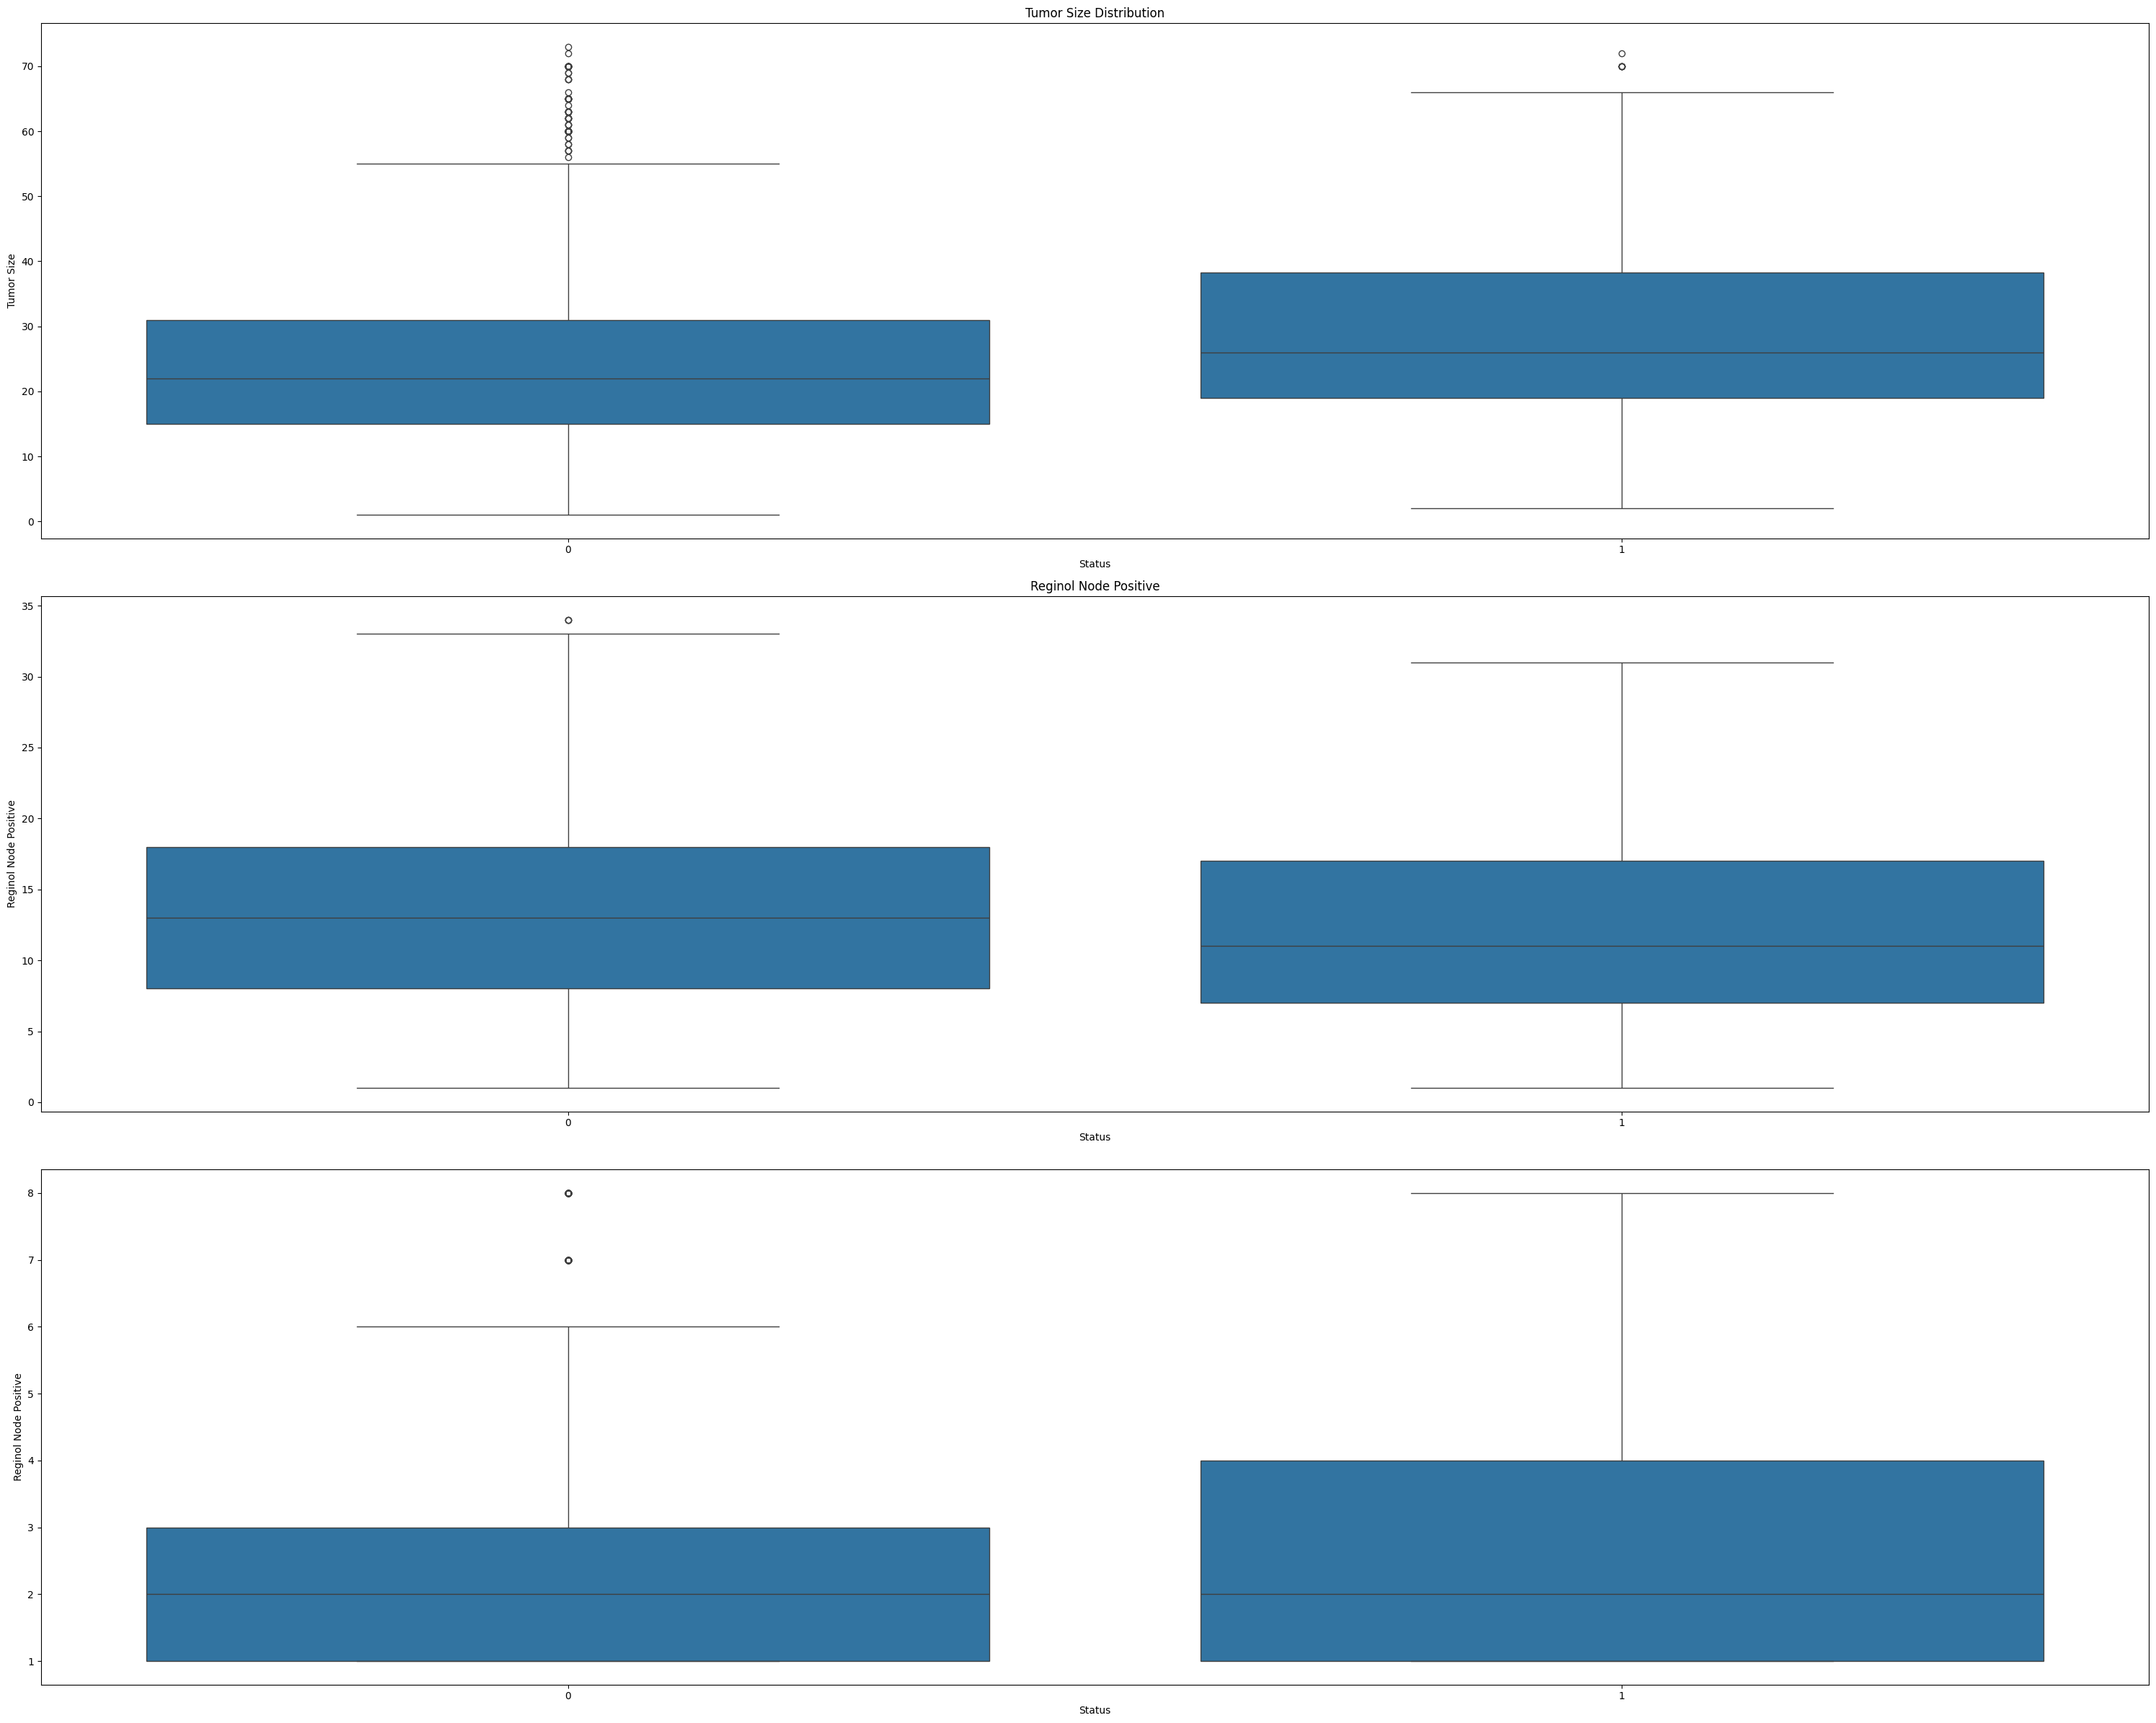

               Age   Tumor Size  Regional Node Examined  \
count  2261.000000  2385.000000             2385.000000   
mean     53.877930    25.820545               13.053249   
std       9.012634    14.560727                7.164247   
min      30.000000     1.000000                1.000000   
25%      47.000000    15.000000                8.000000   
50%      54.000000    22.000000               13.000000   
75%      61.000000    33.000000               18.000000   
max      69.000000    73.000000               34.000000   

       Reginol Node Positive  Survival Months  AStage_binary  \
count            2385.000000      2385.000000    2385.000000   
mean                2.403354        72.850314       0.994130   
std                 1.801376        22.144276       0.076407   
min                 1.000000         2.000000       0.000000   
25%                 1.000000        57.000000       1.000000   
50%                 2.000000        75.000000       1.000000   
75%                 

In [7]:
# double check the outliers of three attributes again

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 24))

# Box plot for Tumor Size
sns.boxplot(x='Status', y='Tumor Size', data=new_df, ax=axes[0])
axes[0].set_title('Tumor Size Distribution')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Tumor Size')

# Box plot for Regional Node Examined
sns.boxplot(x='Status', y='regional_node_group', data=new_df, ax=axes[1])
axes[1].set_title('Regional Node Examined')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Regional Node Examined')

# Box plot for Reginol Node Positive
sns.boxplot(x='Status', y='Reginol Node Positive', data=new_df, ax=axes[2])
axes[1].set_title('Reginol Node Positive')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Reginol Node Positive')

plt.tight_layout()
plt.show()

# new_df = pd.get_dummies(new_df, prefix_sep='_')
print(new_df.describe())

In [8]:
# data binning for tumor size, Regional Node Examined, and Reginol Node Positive

# Tumor Size
# bins = [1,15,30,45,63]
labels = ['Very Small', 'Small', 'Medium', 'Large']
new_df.loc[:,'tumor_size_group'] = pd.cut(new_df.loc[:,'Tumor Size'], bins=4, labels=labels, right=True).astype('category')

# Regional Node Examined
# bins = [1,10,20,40,61]
labels = ['Minimal', 'Moderate', 'High', 'Extensive']
new_df.loc[:,'regional_node_examined_group'] = pd.cut(new_df.loc[:,'Regional Node Examined'], bins=4, labels=labels, right=True)

# Reginol Node Positive (no missing value)
# bins = [0,3,9,20,46]
labels = ['Minimal', 'Moderate', 'High', 'Extensive']
new_df.loc[:,'regional_node_positive_group'] = pd.cut(new_df.loc[:,'Reginol Node Positive'], bins=4, labels=labels, right=True)

print(new_df.loc[:,'tumor_size_group'].value_counts(),'\n')
print(new_df.loc[:,'regional_node_examined_group'].value_counts(),'\n')
print(new_df.loc[:,'regional_node_positive_group'].value_counts(),'\n')

tumor_size_group
Small         990
Very Small    946
Medium        323
Large         126
Name: count, dtype: int64 

regional_node_examined_group
Moderate     988
Minimal      791
High         467
Extensive    139
Name: count, dtype: int64 

regional_node_positive_group
Minimal      1580
Moderate      461
High          232
Extensive     112
Name: count, dtype: int64 



In [9]:
# drop unnecessary columns
new_df.drop(columns=['Age','A Stage','Progesterone Status','Tumor Size', 'Regional Node Examined','Reginol Node Positive','Survival Months'],inplace=True)
print(new_df.info())
print(new_df.isnull().any())

<class 'pandas.core.frame.DataFrame'>
Index: 2385 entries, 0 to 4022
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Race                          2385 non-null   object  
 1   Marital Status                2385 non-null   object  
 2   T Stage                       2385 non-null   object  
 3   N Stage                       2385 non-null   object  
 4   6th Stage                     2385 non-null   object  
 5   differentiate                 2385 non-null   object  
 6   Grade                         2385 non-null   object  
 7   Estrogen Status               2385 non-null   object  
 8   Status                        2385 non-null   object  
 9   age_group                     2385 non-null   category
 10  AStage_binary                 2385 non-null   int64   
 11  Progesterone_Status_binary    2385 non-null   int64   
 12  survival_month_group          2385 non-null   categor

In [10]:
# check if the class data is imbalanced
print('the amounts of alive and dead in Status column:', new_df.loc[:,'Status'].value_counts())

# get dummies for the dataset

df_dummies = pd.get_dummies(new_df.drop(columns=['Status']))
df_dummies.loc[:,'Status'] = new_df.loc[:,'Status'].astype(int)
print("\nNumber of columns generated:", df_dummies.shape[1], '\n')

the amounts of alive and dead in Status column: Status
0    2093
1     292
Name: count, dtype: int64

Number of columns generated: 58 



In [59]:
##### feature selection using Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X = df_dummies.drop(columns=['Status'])
Y = df_dummies['Status'] # y is the target class

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)
rf.fit(X_train, y_train) # Fit the model on training data

# Select features with importance above the mean importance score
selector = SelectFromModel(rf, threshold="mean", prefit=True)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

X_train_reduced = pd.DataFrame(selector.transform(X_train),columns=selected_features)
X_test_reduced = pd.DataFrame(selector.transform(X_test),columns=selected_features)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Display feature importance for each feature
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

 # A list of column names that passed the threshold, representing the most important features according to the random forest model.
print("\nSelected features:\n", selected_features,'\n')
print("The Numbers of Selected features are:", len(selected_features))

AStage_binary: 0.0009
Progesterone_Status_binary: 0.0262
regional_node_group: 0.1247
Race_Black: 0.0123
Race_Other: 0.0107
Race_Unknown: 0.0105
Race_White: 0.0188
Marital Status_Divorced: 0.0145
Marital Status_Married: 0.0244
Marital Status_Separated: 0.0029
Marital Status_Single : 0.0183
Marital Status_Unknown: 0.0113
Marital Status_Widowed: 0.0095
T Stage _T1: 0.0168
T Stage _T2: 0.0135
T Stage _T3: 0.0074
T Stage _T4: 0.0010
N Stage_N1: 0.0111
N Stage_N2: 0.0094
N Stage_N3: 0.0008
6th Stage_IIA: 0.0113
6th Stage_IIB: 0.0119
6th Stage_IIIA: 0.0113
6th Stage_IIIB: 0.0019
6th Stage_IIIC: 0.0006
differentiate_Moderately differentiated: 0.0138
differentiate_Poorly differentiated: 0.0152
differentiate_Undifferentiated: 0.0007
differentiate_Well differentiated: 0.0103
Grade_ anaplastic; Grade IV: 0.0012
Grade_1: 0.0107
Grade_2: 0.0116
Grade_3: 0.0175
Estrogen Status_Negative: 0.0095
Estrogen Status_Positive: 0.0100
age_group_Unknown: 0.0088
age_group_30-39: 0.0077
age_group_40-49: 0.0251
a

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [68]:
######### Random Forest Model (Prediction Part)
# random forest model:
# pros:
# 1.it can handle high dimensional data well without significant risk of overfitting
# 2.it provides feature importance score, which can help us understand which features contribute most to predicting the target class
# cons:
# 1.need to find the best optimal hyperparameters using grid search or randomized search
# 2.While feature importance scores help, understanding the individual trees and splits can be complex

from sklearn.metrics import accuracy_score, classification_report

# Initialize a new Random Forest model for prediction
rf_reduced = RandomForestClassifier(n_estimators=100,class_weight='balanced',max_depth = 5, random_state=42)
rf_reduced.fit(X_train_reduced, y_train) # Fit the model on training data

# Make predictions
y_pred = rf_reduced.predict(X_test_reduced)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred),'\n')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred),'\n') # Display confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8002793296089385 

Confusion Matrix:
 [[508 117]
 [ 26  65]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.88       625
           1       0.36      0.71      0.48        91

    accuracy                           0.80       716
   macro avg       0.65      0.76      0.68       716
weighted avg       0.88      0.80      0.83       716



In [66]:
####  Hyperparameter Tuning -- Random Forest Model
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for n_estimators and max_depth
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10, 15, None]
}

# Initialize the RandomForestClassifier
rf_predict = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf_predict, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_reduced, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 7, 'n_estimators': 50}
Best cross-validation score: 0.9017298735861612


In [67]:

# Retrieve the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize a new GradientBoostingClassifier with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the model on the training data
best_rf_model.fit(X_train_reduced, y_train)

# Predict on the test data
y_pred = best_rf_model.predict(X_test_reduced)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.8994413407821229
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       625
           1       0.83      0.26      0.40        91

    accuracy                           0.90       716
   macro avg       0.87      0.63      0.67       716
weighted avg       0.89      0.90      0.88       716

Confusion Matrix:
 [[620   5]
 [ 67  24]]


In [62]:
########## C4.5DecisionTree
# pros:
# 1.The built-in pruning helps reduce overfitting, and helps the model generalize better on unseen data
# 2.The tree structure is easy to understand, making it simple to interpret classification rules.
# cons:
# 1.Small changes in data can lead to a different tree structure, which may reduce model stability.
# 2.Although it can handle continuous features, C4.5 creates binary splits, which may limit its effectiveness on complex, high-dimensional data.

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree similar to C4.5 with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth=None, 
                                 min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the model on training data
clf.fit(X_train_reduced, y_train)

# Make predictions
y_pred = clf.predict(X_test_reduced)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred),'\n')
print("Classification Report:\n", classification_report(y_test, y_pred),'\n')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred),'\n') # Display confusion matrix


Accuracy: 0.8296089385474861 

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       625
           1       0.35      0.38      0.36        91

    accuracy                           0.83       716
   macro avg       0.63      0.64      0.63       716
weighted avg       0.84      0.83      0.83       716
 

Confusion Matrix:
 [[559  66]
 [ 56  35]] 



In [63]:
########## GradientBoosting
# pros:
# 1.it provides feature importance scores, helping to identify the most influential features in the dataset.
# 2.it captures complex, non-linear relationships, which can improve predictive power in datasets with intricate patterns.
# cons:
# 1.Training can be slow and resource-intensive, especially with large datasets or many boosting rounds.
# 2.Performance depends heavily on tuning parameters like learning_rate, n_estimators, and max_depth, which can be time-consuming to optimize.

from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# Oversampling the Minority Class
smote = SMOTE(random_state=42)
X_train_reduced_resampled, y_resampled = smote.fit_resample(X_train_reduced, y_train)

# Initialize the Gradient Boosting model and train the model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train_reduced_resampled, y_resampled)

# Make predictions on the test set
y_pred = gb.predict(X_test_reduced)

print("Accuracy:", accuracy_score(y_test, y_pred),'\n') # Print accuracy
print("Classification Report:\n", classification_report(y_test, y_pred),'\n') # Print classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred),'\n') # Display confusion matrix

Accuracy: 0.8994413407821229 

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       625
           1       0.69      0.37      0.49        91

    accuracy                           0.90       716
   macro avg       0.80      0.67      0.71       716
weighted avg       0.89      0.90      0.89       716
 

Confusion Matrix:
 [[610  15]
 [ 57  34]] 



In [42]:
####  Hyperparameter Tuning -- GradientBoosting

# Define the parameter grid for n_estimators, learning_rate, max_depth
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
}

# Initialize the RandomForestClassifier
gb_predict = GradientBoostingClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=gb_predict, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_reduced, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Best cross-validation score: 0.901731671791552


In [69]:

# Retrieve the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize a new GradientBoostingClassifier with the best parameters
best_gb_model = GradientBoostingClassifier(**best_params, random_state=42)

# Fit the model on the training data
best_gb_model.fit(X_train_reduced, y_train)

# Predict on the test data
y_pred = best_gb_model.predict(X_test_reduced)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.8910614525139665
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       625
           1       0.68      0.27      0.39        91

    accuracy                           0.89       716
   macro avg       0.79      0.63      0.67       716
weighted avg       0.87      0.89      0.87       716

Confusion Matrix:
 [[613  12]
 [ 66  25]]


In [ ]:
########## Naïve Bayes
# pros:
# 1.it is inexpensive and suitable for large datasets, providing quick training and prediction times.
# 2.it performs surprisingly well on small datasets where complex models might overfit.
# cons:
# 1.Although GaussianNB handles continuous data, it assumes a Gaussian distribution, which may not always fit well.
# 2.Naïve Bayes is a simple linear classifier, which may not perform well on complex, non-linear relationships in the data.

from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Oversampling the Minority Class
smote = SMOTE(random_state=42)
X_train_reduced_resampled, y_resampled = smote.fit_resample(X_train_reduced, y_train)

nb = GaussianNB() # Initialize Gaussian Naïve Bayes
nb.fit(X_train_reduced_resampled, y_resampled)

y_pred = nb.predict(X_test_reduced)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred),'\n')
print("Classification Report:\n", classification_report(y_test, y_pred),'\n')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred),'\n') # Display confusion matrix

Accuracy: 0.840782122905028 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       625
           1       0.41      0.62      0.50        91

    accuracy                           0.84       716
   macro avg       0.68      0.74      0.70       716
weighted avg       0.87      0.84      0.85       716
 

Confusion Matrix:
 [[546  79]
 [ 35  56]] 



In [39]:
########## KNN
# pros:
# 1.KNN can capture complex, non-linear decision boundaries.
# 2.KNN can be easily extended to multi-class classification by selecting the majority class among the nearest neighbors.
# cons:
# 1.KNN relies on distance calculations, so differences in feature scales can impact performance. It’s essential to normalize or standardize features before applying KNN.
# 2.KNN may favor the majority class in imbalanced datasets, as it uses a majority vote among neighbors. This can lead to poor performance on minority classes.

from collections import Counter

# Define Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Define KNN classifier from scratch
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        return np.array([self._predict_single(x) for x in X_test])

    def _predict_single(self, x):
        # Calculate distances from x to all training points
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Get indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Get labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Get the most common label among the neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# # Prepare the dataset (X and y)
X = df_dummies.drop(columns=['Status']).values
y = df_dummies['Status'].values

# # Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Oversampling the Minority Class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the KNN model on the resampled data, then train and predict using KNN
knn = KNNClassifier(k=5)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred),'\n')
print("Classification Report:\n", classification_report(y_test, y_pred),'\n')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred),'\n') # Display confusion matrix



Accuracy: 0.6843575418994413 

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80       625
           1       0.20      0.49      0.28        91

    accuracy                           0.68       716
   macro avg       0.55      0.60      0.54       716
weighted avg       0.82      0.68      0.73       716
 

Confusion Matrix:
 [[445 180]
 [ 46  45]] 



In [18]:
########## Neural Network
# pros:
# 1.Neural networks can capture complex, non-linear relationships, leading to high accuracy on both Alive and Dead classes.
# 2.Achieves similar precision and recall for both classes, which is beneficial for medical applications.
# cons:
# 1.Requires significant computational power and time for training, particularly with large datasets.
# 2.Lacks transparency; hard to interpret and explain the model’s decisions in a medical context.

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


# Split and standardize data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode target for multi-class classification
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Build neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid'))

# Compile model
loss_function = 'categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy'
model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

# Predictions and classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) if num_classes > 2 else (y_pred > 0.5).astype(int).reshape(-1)

if num_classes == 2:
    y_test = y_test.reshape(-1)

print("Classification Report:\n", classification_report(y_test, y_pred_classes))


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5661 - loss: 0.6784 - val_accuracy: 0.8353 - val_loss: 0.4261
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.8897 - loss: 0.3529 - val_accuracy: 0.8383 - val_loss: 0.3897
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.8897 - loss: 0.2978 - val_accuracy: 0.8563 - val_loss: 0.3628
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.9011 - loss: 0.2729 - val_accuracy: 0.8713 - val_loss: 0.3561
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.9269 - loss: 0.2241 - val_accuracy: 0.8713 - val_loss: 0.3442
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.9248 - loss: 0.2155 - val_accuracy: 0.8683 - val_loss: 0.3449
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.9320 - loss: 0.1855 - val_accuracy: 0.8713 - val_loss: 0.3489
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.9350 - loss: 0.1863 - val_accuracy: 0.8683 - val_lo